# Simulating Networks

In [13]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)
random.seed(seed)
# Import NetworkX
import networkx as nx

## Watts-Strogatz and Small Worlds

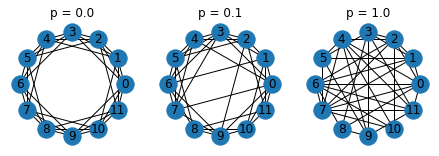

In [14]:
plt.figure(figsize=(7.5, 2.25))
for i, p in enumerate([0.0, 0.1, 1.0]):
    # Generate the graph
    G = nx.watts_strogatz_graph(12, 6, p)
    # Create layout and draw
    plt.subplot(1, 3, i + 1)
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos=pos)
    plt.title("p = {:0.1f}".format(p))

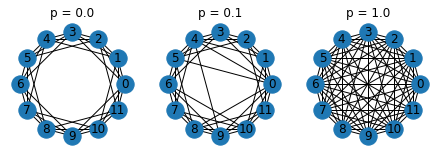

In [15]:
plt.figure(figsize=(7.5, 2.25))
for i, p in enumerate([0.0, 0.1, 1.0]):
    # Generate the graph
    G = nx.newman_watts_strogatz_graph(12, 6, p)
    # Create layout and draw
    plt.subplot(1, 3, i + 1)
    pos = nx.circular_layout(G)
    nx.draw_networkx(G, pos=pos)
    plt.title("p = {:0.1f}".format(p))

## Preferential Attachment and Scale-Free Networks

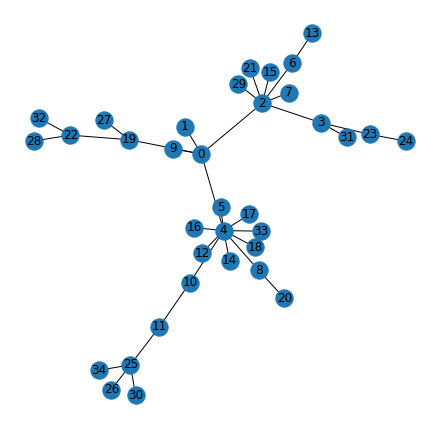

In [16]:
G_preferential_35 = nx.barabasi_albert_graph(35, 1)
pos = nx.spring_layout(G_preferential_35, k=0.1)
nx.draw_networkx(G_preferential_35, pos)

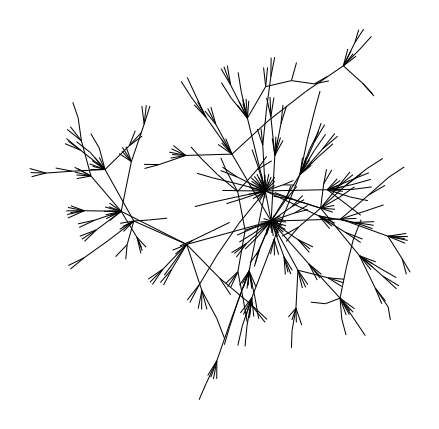

In [17]:
G_preferential_500 = nx.barabasi_albert_graph(500, 1)
pos = nx.spring_layout(G_preferential_500)
nx.draw_networkx(G_preferential_500, pos, node_size=0, with_labels=False)

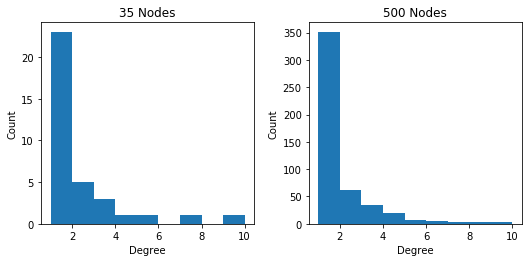

In [18]:
def plot_degree_hist(G, title):
    """Plot histogram of node degrees."""
    plt.hist(dict(nx.degree(G)).values(), bins=range(1, 11))
    # Label axes
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.title(title)
    
plt.figure(figsize=(7.5, 3.75))
ax = plt.subplot(1,2,1)
plot_degree_hist(G_preferential_35, '35 Nodes')
for spine in ax.spines.values():
    spine.set_visible(True)
ax = plt.subplot(1,2,2)
for spine in ax.spines.values():
    spine.set_visible(True)
plot_degree_hist(G_preferential_500, '500 Nodes')
plt.tight_layout()

## Configuration Models

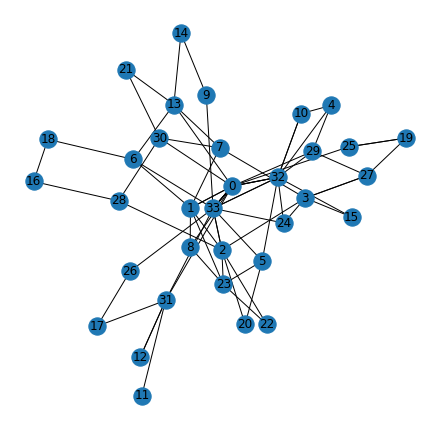

In [19]:
# Find degrees of karate club nodes
G_karate = nx.karate_club_graph()
degree_sequence = dict(nx.degree(G_karate)).values()
# Generate a random network with the same node degrees
G_configuration = nx.degree_seq.configuration_model(degree_sequence)
nx.draw_networkx(G_configuration)

## Agent-Based Models

In [20]:
def initial_beliefs(G, true_value=0, std=15):
    """Generate estimates of a true value with normally-distributed errors."""
    beliefs = dict(
        (v, random.gauss(true_value, std))
        for v in G.nodes())
    return beliefs
beliefs = initial_beliefs(G_karate, true_value=42)

In [21]:
def learning_step(G, beliefs):
    '''Update each node's beliefs based on its neighbors' beliefs'''
    new_beliefs = dict()
    for v in G.nodes():
        # Include old belief in average
        total = beliefs[v]
        count = 1
        # Update average based on each neighbor
        for w in G.neighbors(v):
            total += beliefs[w]
            count += 1
        # Calculate average for node w
        new_beliefs[v] = total / count
    return new_beliefs

In [22]:
def plot_beliefs(G, initial_beliefs, true_value=0, steps=10):
    """Plot change in beliefs over time."""
    current_beliefs = dict(initial_beliefs)
    beliefs = [current_beliefs]
    # Create dicts of x and y values for each node
    x = dict((v, list()) for v in G.nodes())
    y = dict((v, list()) for v in G.nodes())
    # Repeatedly update beliefs
    for i in range(steps + 1):
        for v in G.nodes():
            x[v].append(i)
            y[v].append(current_beliefs[v])
        if i < steps:
            current_beliefs = learning_step(G, current_beliefs)
            beliefs.append(current_beliefs)
    # Plot evolution of each node's beliefs
    for v in G.nodes():
        plt.plot(x[v], y[v], 'b-', alpha=0.3, linewidth=2)
    # Plot true value
    plt.plot([0, steps], [true_value, true_value], 'k:')
    # Add spines to plot
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(True)
    plt.xlim([0, steps])
    plt.ylim([22, 62])

In [23]:
networks = {
    'Karate Club': G_karate,
    'Configuration Model': G_configuration,
    'Preferential Attachment': nx.barabasi_albert_graph(34, 1),
    'Ring': nx.watts_strogatz_graph(34, 6, 0),
    'Watts-Strogatz (p=0.3)': nx.watts_strogatz_graph(34, 6, 0.1),
    'Watts-Strogatz (p=1)': nx.watts_strogatz_graph(34, 6, 1)}

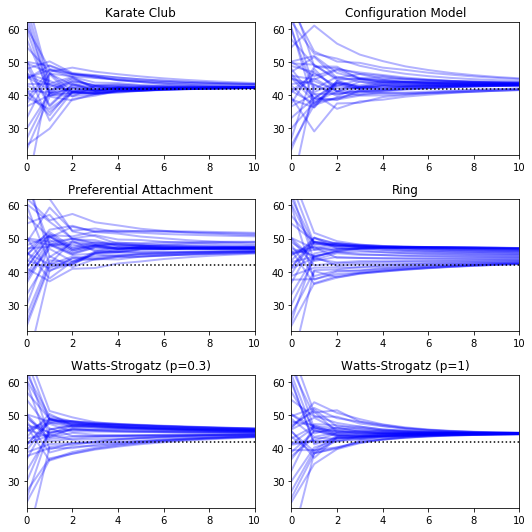

In [24]:
for i, (title, G) in enumerate(networks.items()):
    plt.subplot(3, 2, i + 1)
    plt.title(title)
    plot_beliefs(G, beliefs, 42)
plt.tight_layout()